1. Framing the Problem 
The aim is to predict median_house_value based on three independent variables:

median_income
population
households


2. Getting the Data

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading dataset
housing = pd.read_csv("housing.csv") 

# Display basic info about the dataset
housing.info()

# Display first few rows
housing.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


3. Exploratory Data Analysis (EDA)

3.1.Explore statistics

In [3]:
housing.describe() # describing the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


3.2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next.

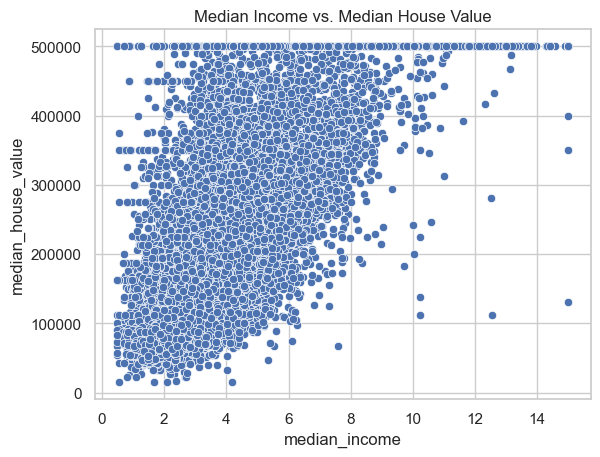

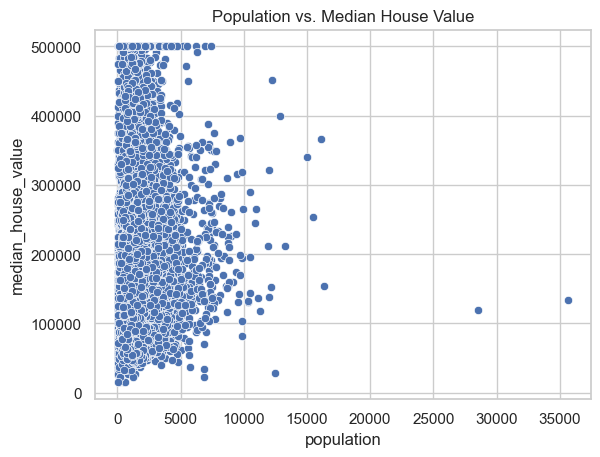

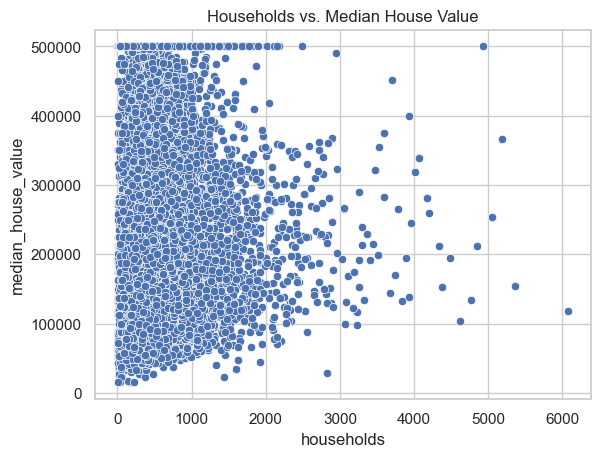

In [4]:
sns.set(style="whitegrid", color_codes=True)

# Median Income vs. House Value
sns.scatterplot(x="median_income", y="median_house_value", data=housing)
plt.title("Median Income vs. Median House Value")
plt.show()

# Population vs. House Value
sns.scatterplot(x="population", y="median_house_value", data=housing)
plt.title("Population vs. Median House Value")
plt.show()

# Households vs. House Value
sns.scatterplot(x="households", y="median_house_value", data=housing)
plt.title("Households vs. Median House Value")
plt.show()


3.3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant

Median Income:

Range: Approximately 0.5 to 15 (tens of thousands of dollars).
Insight: Indicates a strong relationship between income and home values, with higher wages typically translating into higher home values.

Population:

Range: From 3 to about 35,000.
Insight: There is not a clear correlation between population size and home values in the scatter plot, indicating little predictive capacity.

Number of Households:

Range: From 1 to over 6,000.
Insight: There is a minor positive association between house values and income, although it is not as strong as the median.

Median House Value:

Range: $15,000 to $500,000.
Insight: Median income has the greatest impact on this dependent variable out of all the factors examined.

4.Run three linear regressions

In [5]:
# Remove records with maximum house value to avoid capping bias
housing_filtered = housing[housing.median_house_value != 500001]

# Split data (80% train, 20% test)
train_size = int(len(housing_filtered) * 0.8)
train = housing_filtered[:train_size]
test = housing_filtered[train_size:]


4.1. median house value vs. median income

In [6]:
# Train model
model_income = LinearRegression()
model_income.fit(train[["median_income"]], train["median_house_value"])

# Predictions
y_pred_income = model_income.predict(test[["median_income"]])

# Metrics
mse_income = mean_squared_error(test["median_house_value"], y_pred_income)
mae_income = mean_absolute_error(test["median_house_value"], y_pred_income)

print(f"Intercept: {model_income.intercept_}, Coefficient: {model_income.coef_}")
print(f"MSE: {mse_income}, MAE: {mae_income}")


Intercept: 48204.534368169785, Coefficient: [38702.97233842]
MSE: 5831038297.419372, MAE: 59961.60099129183


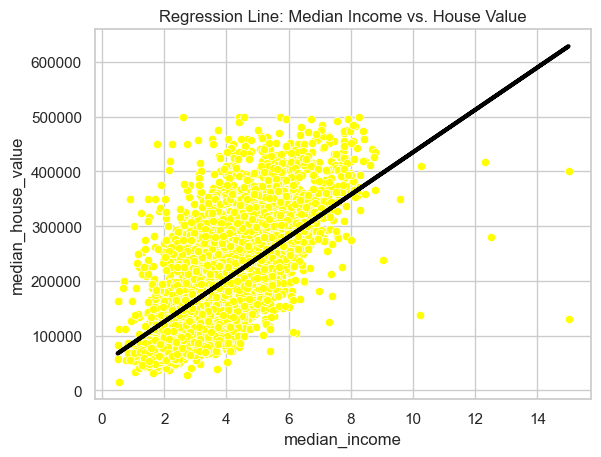

In [15]:
#Regression line plot
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="yellow")
plt.plot(test["median_income"], y_pred_income, color="black", linewidth=3)
plt.title("Regression Line: Median Income vs. House Value")
plt.show()


4.2.median house value vs. population

In [8]:
model_pop = LinearRegression()
model_pop.fit(train[["population"]], train["median_house_value"])

y_pred_pop = model_pop.predict(test[["population"]])

mse_pop = mean_squared_error(test["median_house_value"], y_pred_pop)
mae_pop = mean_absolute_error(test["median_house_value"], y_pred_pop)

print(f"Intercept: {model_pop.intercept_}, Coefficient: {model_pop.coef_}")
print(f"MSE: {mse_pop}, MAE: {mae_pop}")


Intercept: 188081.58862583563, Coefficient: [0.32862973]
MSE: 10863782849.78328, MAE: 85178.9089807831


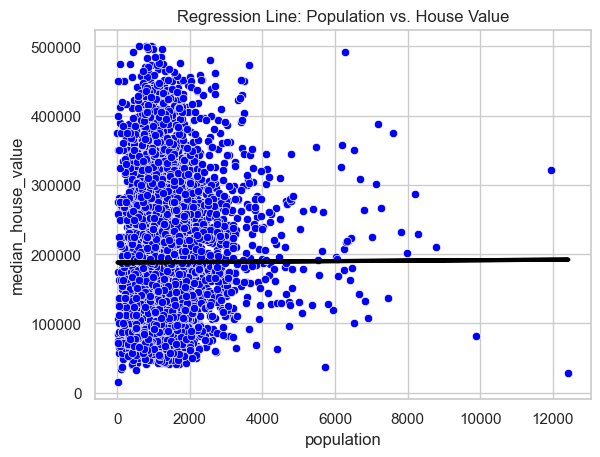

In [16]:
#Regression Line plot
sns.scatterplot(x="population", y="median_house_value", data=test, color="blue")
plt.plot(test["population"], y_pred_pop, color="black", linewidth=3)
plt.title("Regression Line: Population vs. House Value")
plt.show()


4.3. median house value vs. number of households

In [10]:
model_households = LinearRegression()
model_households.fit(train[["households"]], train["median_house_value"])

y_pred_households = model_households.predict(test[["households"]])

mse_households = mean_squared_error(test["median_house_value"], y_pred_households)
mae_households = mean_absolute_error(test["median_house_value"], y_pred_households)

print(f"Intercept: {model_households.intercept_}, Coefficient: {model_households.coef_}")
print(f"MSE: {mse_households}, MAE: {mae_households}")


Intercept: 177147.28853834848, Coefficient: [22.62572591]
MSE: 10759278800.526697, MAE: 84503.1472350856


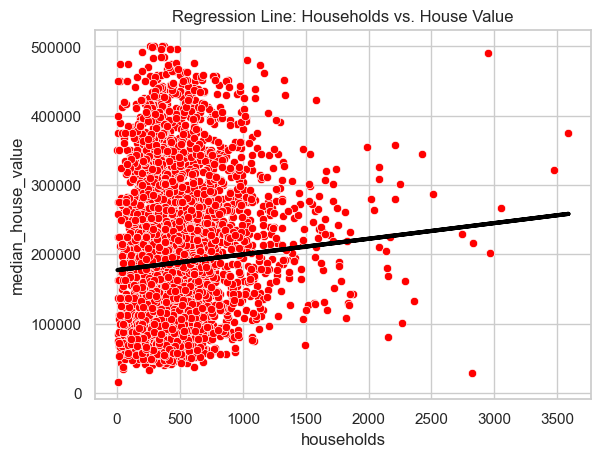

In [17]:
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.plot(test["households"], y_pred_households, color="black", linewidth=3)
plt.title("Regression Line: Households vs. House Value")
plt.show()


5. In a single table for all three linear regressions, provide per regression model

Variable	          Intercept (USD)	Slope	     Mean Squared Error (USD^2)	  Mean Absolute Error (USD)
Median Income	        48,204.53	     38,702.97	  5,831,038,297.42	               59,961.60
Population	            188,081.59	     0.33	      10,863,782,849.78                85,178.91
Number of Households	177,147.29	     22.63	      10,759,278,800.53	               84,503.15

6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression(data, x, y, y_pred, title, intercept, slope, mse, mae):
    # Creating the scatter plot
    sns.scatterplot(x=x, y=y, data=data, color="blue")
    # Plot the regression line
    plt.plot(data[x], y_pred, color="black", linewidth=2)
    # Setting the title and labels
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    # Annotate the plot with regression information
    plt.text(0.05, 0.95, f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.5))
    plt.show()
    


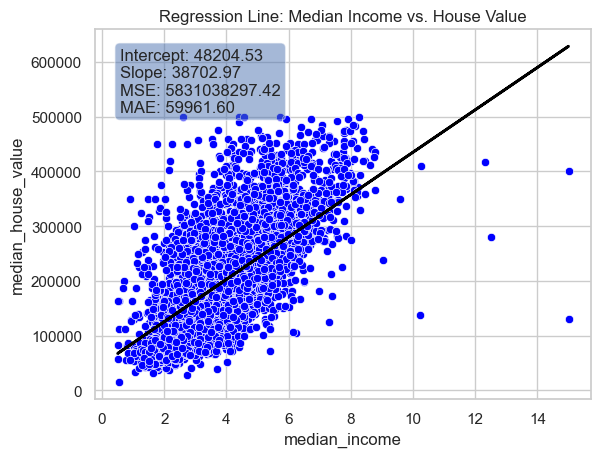

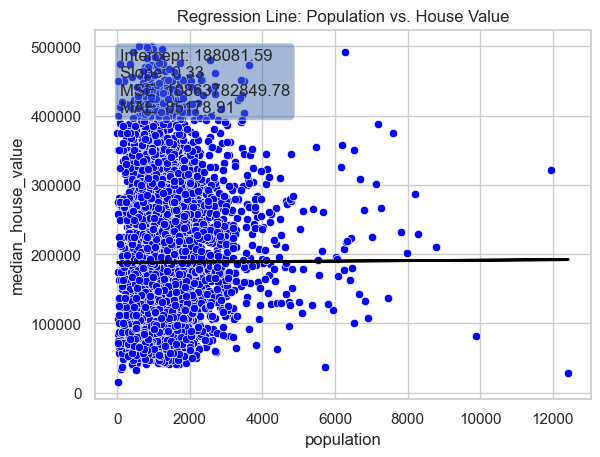

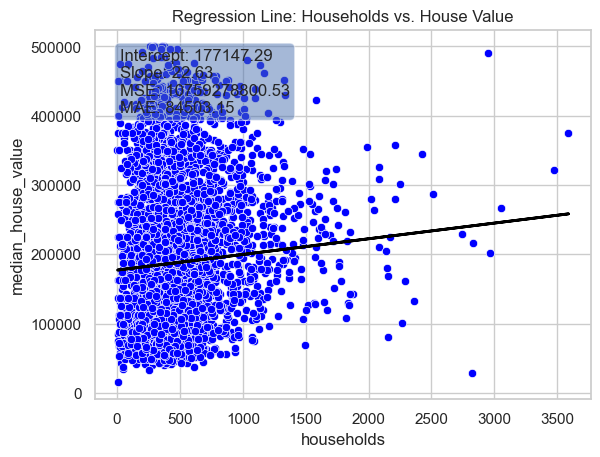

In [14]:
# Assuming `test` and prediction variables (`y_pred_income`, etc) are defined accurately
plot_regression(test, "median_income", "median_house_value", y_pred_income, "Regression Line: Median Income vs. House Value", 48204.53, 38702.97, 5831038297.42, 59961.60)
plot_regression(test, "population", "median_house_value", y_pred_pop, "Regression Line: Population vs. House Value", 188081.59, 0.33, 10863782849.78, 85178.91)
plot_regression(test, "households", "median_house_value", y_pred_households, "Regression Line: Households vs. House Value", 177147.29, 22.63, 10759278800.53, 84503.15)


7. Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed.

The three regression models—Median Income vs. Median House Value, Population vs. Median House Value, and Households vs. Median House Value—are analyzed, and the results show clear variations in their prediction ability and degree of the correlation:

Median Income vs. Median House Value:

Goodness-of-Fit: The model that has the lowest Mean Squared Error (MSE) of around 5.83 billion and the lowest Mean Absolute Error (MAE) of roughly 59,961 is the strongest of the three.
Interpretation: As the median income increases, the median house value tends to rise as well, according to the regression line's strong positive slope. With a comparatively high degree of prediction, this model indicates that median income plays a significant role in influencing home values.


Population vs. Median House Value:

Goodness-of-Fit: This model has the worst fit, with the highest MSE of roughly 10.86 billion and MAE of roughly 85,179.
Interpretation: There is minimal to no correlation between population size and median home values, as indicated by the regression line's nearly zero slope. Widespread scatter that does not cluster around the regression line indicates that either population size is not a good predictor or that other variables not in the model may have a substantial impact on house values.

Households vs. Median House Value:

Goodness-of-Fit: Similar to the population model, with an MAE of about 84,503 and an MSE of about 10.76 billion.
Interpretation: This model's predictive power is constrained, even with a modest positive slope. Compared to population size, the scatter plot indicates that the number of households has a weaker but somewhat more consistent link with rising housing values.


Additional Insights

The income model's slope is significantly steeper than that of families or the population, emphasizing that economic standing has a stronger and more direct impact on housing costs.

The population and household models' weak correlations imply that additional socioeconomic characteristics, site specificity, urban versus rural settings, and other aspects may be essential to incorporate into more thorough models.

Policymakers and urban planners can use the insights from these models to determine how important income levels are in relation to just population growth when it comes to housing initiatives and economic analyses.

Conclusion: The analysis shows that median income is a key predictor of home values, with predictive ability that greatly exceeds statistical measures like population size and number of households. These results highlight how crucial it is to take economic considerations into account when evaluating the housing market and developing urban planning plans, rather than just focusing on demographic indicators.